# Tutorial

Here we reproduce the LAN tutorial from official website: https://hddm.readthedocs.io/en/latest/lan_tutorial.html#tutorial


Please check the website for details instructions


## Section 0: Colab Prep (not neccessary in this docker image)

### imports

In [1]:
# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm

## Section 1: Model Info / Simulation / Basic Plotting

### 1.1 Access Meta-Data

In [2]:
# List the models currently available
hddm.model_config.model_config.keys()

dict_keys(['ddm_vanilla', 'full_ddm_vanilla', 'ddm', 'angle', 'weibull', 'levy', 'full_ddm', 'ornstein', 'ddm_sdv', 'ddm_par2', 'ddm_par2_no_bias', 'ddm_par2_angle_no_bias', 'ddm_par2_weibull_no_bias', 'ddm_seq2', 'ddm_seq2_no_bias', 'ddm_seq2_angle_no_bias', 'ddm_seq2_weibull_no_bias', 'ddm_mic2_adj', 'ddm_mic2_adj_no_bias', 'ddm_mic2_adj_angle_no_bias', 'ddm_mic2_adj_weibull_no_bias', 'race_no_bias_3', 'race_no_bias_angle_3', 'race_no_bias_4', 'race_no_bias_angle_4', 'lca_no_bias_3', 'lca_no_bias_angle_3', 'lca_no_bias_4', 'lca_no_bias_angle_4', 'weibull_cdf', 'full_ddm2'])

#### NOTE

You find two kinds of extra models which were not mentioned in the model listing above:

    Experimental models, which eventually will be fully documented (or dropped)

    vanilla models are used predominantly with the basic HDDM() classes. These models are not to be used with the HDDMnn() classes.

#### Now taking a closer look at the angle model

In [3]:
# Metadata
model = 'ddm'
n_samples = 1000

In [4]:
# Config for our current model
hddm.model_config.model_config[model]

{'doc': 'Basic DDM. Meant for use with the LAN extension. \nNote that the boundaries here are coded as -a, and a in line with all other models meant for the LAN extension. \nTo compare model fits between standard HDDM and HDDMnn when using the DDM model, multiply the boundary (a) parameter by 2. \nWe recommend using standard HDDM if you are interested in the basic DDM, but you might want to use this for testing.',
 'params': ['v', 'a', 'z', 't'],
 'params_trans': [0, 0, 1, 0],
 'params_std_upper': [1.5, 1.0, None, 1.0],
 'param_bounds': [[-3.0, 0.3, 0.1, 0.001], [3.0, 2.5, 0.9, 2.0]],
 'boundary': <function hddm.simulators.boundary_functions.constant(t=0)>,
 'params_default': [0.0, 1.0, 0.5, 0.001],
 'hddm_include': ['z'],
 'choices': [-1, 1],
 'slice_widths': {'v': 1.5,
  'v_std': 1,
  'a': 1,
  'a_std': 1,
  'z': 0.1,
  'z_trans': 0.2,
  't': 0.01,
  't_std': 0.15}}

In [5]:
# Looking at the doc string before using the model
print(hddm.model_config.model_config[model]['doc'])

Basic DDM. Meant for use with the LAN extension. 
Note that the boundaries here are coded as -a, and a in line with all other models meant for the LAN extension. 
To compare model fits between standard HDDM and HDDMnn when using the DDM model, multiply the boundary (a) parameter by 2. 
We recommend using standard HDDM if you are interested in the basic DDM, but you might want to use this for testing.


### 1.2 Generate Data

In [6]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 1,
                                                                                  n_trials_per_subject = n_samples,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)

In [7]:
data

,rt,response,subj_idx,v,a,z,t
0,3.230617,0.0,0,-1.939992,1.617796,0.720017,1.193582
1,2.529589,0.0,0,-1.939992,1.617796,0.720017,1.193582
2,1.903577,0.0,0,-1.939992,1.617796,0.720017,1.193582
3,1.897577,0.0,0,-1.939992,1.617796,0.720017,1.193582
4,2.360581,0.0,0,-1.939992,1.617796,0.720017,1.193582
...,...,...,...,...,...,...,...
995,2.304578,0.0,0,-1.939992,1.617796,0.720017,1.193582
996,2.331580,0.0,0,-1.939992,1.617796,0.720017,1.193582
997,2.107574,0.0,0,-1.939992,1.617796,0.720017,1.193582
998,2.631594,0.0,0,-1.939992,1.617796,0.720017,1.193582


In [8]:
full_parameter_dict

{'z': 0.7200166589922504,
 'a': 1.6177960689289146,
 'v': -1.9399924473664072,
 't': 1.1935823574869786}

### 1.2 First Plot

subj_idx(0)


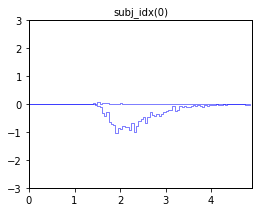

In [9]:
hddm.plotting.plot_from_data(df = data,
                             generative_model = model,
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 5, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': False})
plt.show()

subj_idx(0)


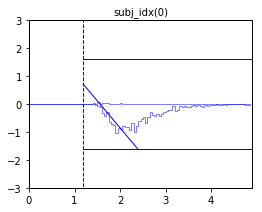

In [10]:
hddm.plotting.plot_from_data(df = data,
                             generative_model = model,
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 5, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': True})
plt.show()

## Section 2: Single Subject (or collapsed) Data

In [11]:
# Metadata
nmcmc = 1500
model = 'angle'
n_samples = 1000
includes = hddm.model_config.model_config[model]['hddm_include']

In [12]:
# Generate some simulatred data
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 1,
                                                                                  n_trials_per_subject = n_samples,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None, # need this to make initial covariate matrix from which to use dmatrix (patsy)
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [13]:
data

,rt,response,subj_idx,v,a,z,t,theta
0,2.339197,0.0,0,-2.284147,1.369227,0.530027,1.303204,0.700265
1,1.922200,0.0,0,-2.284147,1.369227,0.530027,1.303204,0.700265
2,1.663203,0.0,0,-2.284147,1.369227,0.530027,1.303204,0.700265
3,1.849201,0.0,0,-2.284147,1.369227,0.530027,1.303204,0.700265
4,1.714202,0.0,0,-2.284147,1.369227,0.530027,1.303204,0.700265
...,...,...,...,...,...,...,...,...
995,2.055198,0.0,0,-2.284147,1.369227,0.530027,1.303204,0.700265
996,1.758202,0.0,0,-2.284147,1.369227,0.530027,1.303204,0.700265
997,1.516204,0.0,0,-2.284147,1.369227,0.530027,1.303204,0.700265
998,1.610204,0.0,0,-2.284147,1.369227,0.530027,1.303204,0.700265


In [14]:
# Define the HDDM model
hddmnn_model = hddm.HDDMnn(data,
                           informative = False,
                           include = includes,
                           p_outlier = 0.01,
                           w_outlier = 0.1,
                           model = model,)

{'v': 1.5, 'v_std': 1, 'a': 1, 'a_std': 1, 'z': 0.1, 'z_trans': 0.2, 't': 0.01, 't_std': 0.15, 'theta': 0.1, 'theta_std': 0.2}
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [15]:
# Sample
hddmnn_model.sample(nmcmc,
                    burn = 500)

 [-----------------100%-----------------] 1500 of 1500 complete in 53.4 sec

### 2.1 Visualization

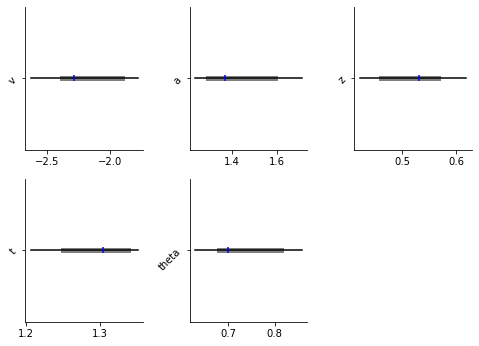

In [16]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

#### 2.1.1 Posterior Predictive (via `model cartoon plot`)

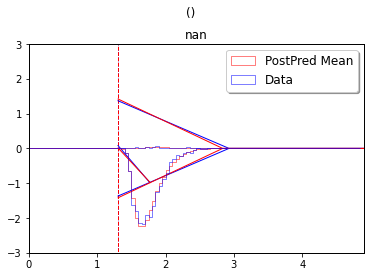

In [17]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (6, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'samples': 200})
plt.show()

**A small note on convergence:**

Plotting v
Plotting a
Plotting z
Plotting t
Plotting theta


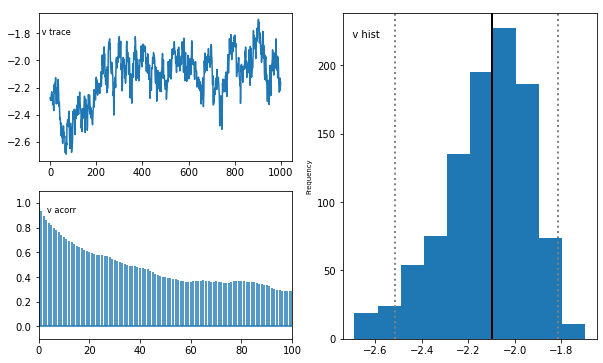

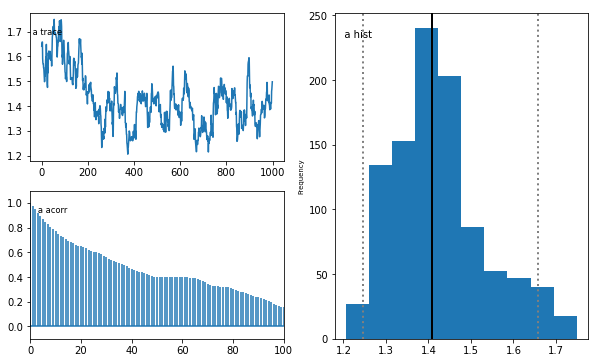

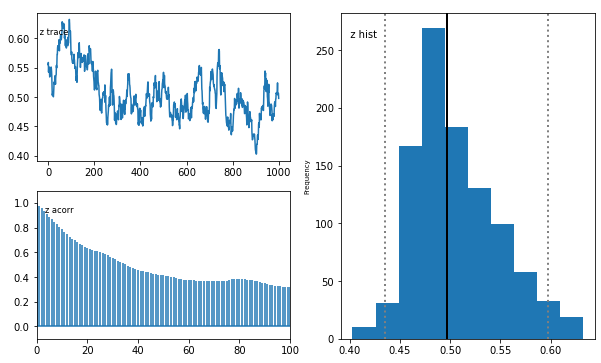

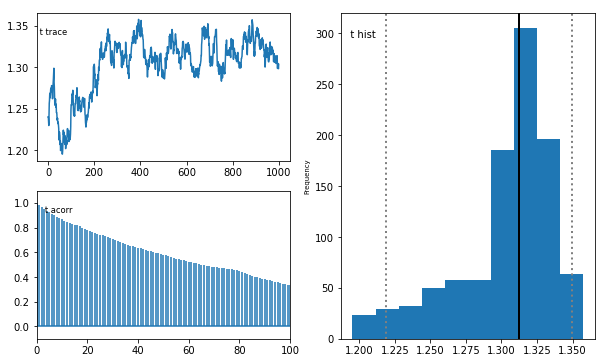

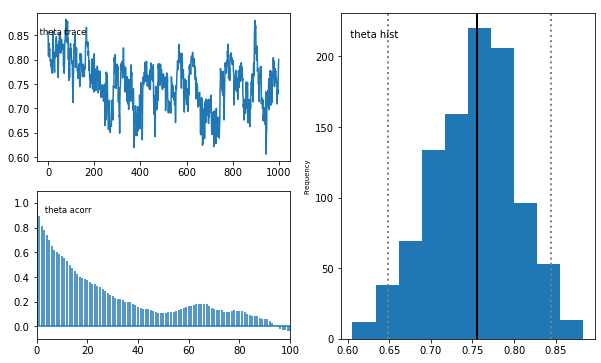

In [18]:
# TAKING A LOOK AT THE POSTERIOR TRACES
hddmnn_model.plot_posteriors(hddm.simulators.model_config[model]['params'])
plt.show()

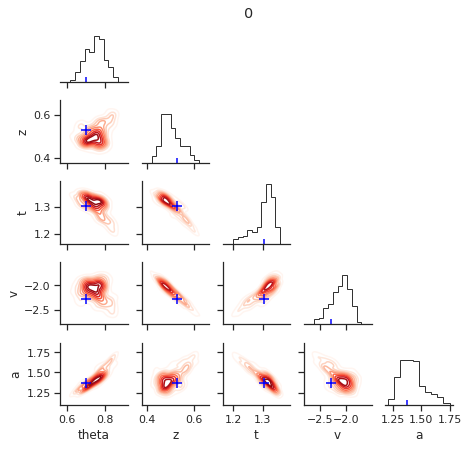

In [19]:
hddm.plotting.plot_posterior_pair(hddmnn_model, save = False,
                                  parameter_recovery_mode = True,
                                  samples = 500,
                                  figsize = (6, 6))

## Section 3: Hierarchical Models

In [20]:
# Metadata
nmcmc = 1000
model = 'angle'
n_trials_per_subject = 200
n_subjects = 10

In [21]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(data = None,
                                                                                  n_subjects = n_subjects,
                                                                                  n_trials_per_subject = n_trials_per_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [22]:
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           is_group_model = True,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0)

{'v': 1.5, 'v_std': 1, 'a': 1, 'a_std': 1, 'z': 0.1, 'z_trans': 0.2, 't': 0.01, 't_std': 0.15, 'theta': 0.1, 'theta_std': 0.2}
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [23]:
hddmnn_model.sample(nmcmc,
                    burn = 100) # if you want to save the model specify extra arguments --> dbname='traces.db', db='pickle'. # hddmnn_model.save('test_model')

 [-----------------100%-----------------] 1000 of 1000 complete in 336.9 sec

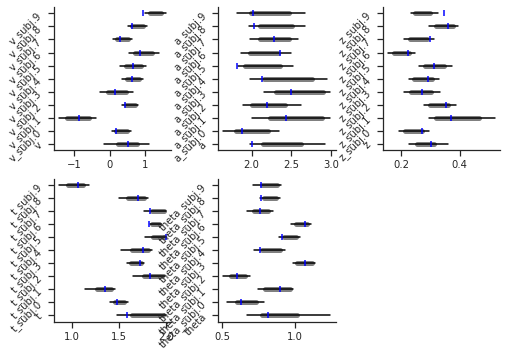

In [24]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

## Section 4: Parameter varies by Condition

In [25]:
# Metadata
nmcmc = 1000
model = 'angle'
n_trials_per_subject = 500

# We allow the boundary conditions to vary
depends_on = {'a': ['c_one']}

# They will depend on a fictious column 'c_one' that specifies
# levels / conditions
conditions = {'c_one': ['low', 'medium', 'high']}

In [26]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 1,
                                                                                  n_trials_per_subject = n_trials_per_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = conditions,
                                                                                  depends_on = depends_on,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [27]:
# Let's check the resulting parameter vector
full_parameter_dict

{'z': 0.5690875083015259,
 't': 1.0062307804219082,
 'v': 1.925359376299687,
 'theta': 0.5153523030986985,
 'a(high)': 1.7628756748691472,
 'a(low)': 2.0855472912910495,
 'a(medium)': 1.3490045633553014}

In [28]:
# Make HDDM Model
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0,
                           is_group_model = False,
                           depends_on = depends_on)


{'v': 1.5, 'v_std': 1, 'a': 1, 'a_std': 1, 'z': 0.1, 'z_trans': 0.2, 't': 0.01, 't_std': 0.15, 'theta': 0.1, 'theta_std': 0.2}
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [29]:
# Sample
hddmnn_model.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 1000 of 1000 complete in 79.6 sec

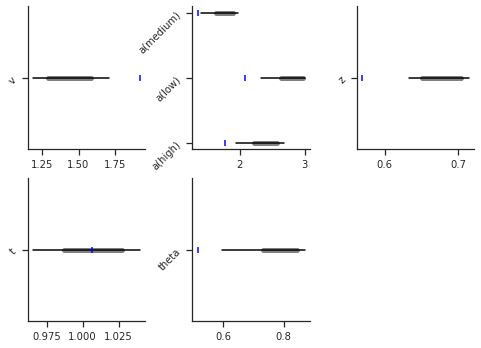

In [30]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

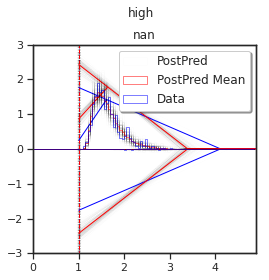

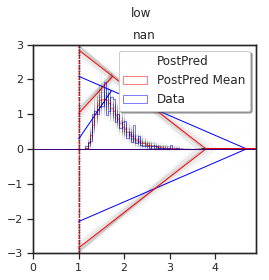

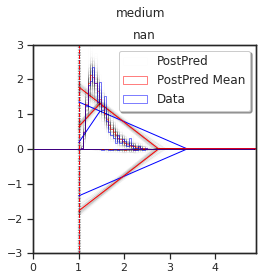

In [31]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (4, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_rts': True,
                                        'add_posterior_uncertainty_model': True,
                                        'samples': 200})
plt.show()

### 4.1 Combine hierarchical and condition data

In [35]:
# Metadata
nmcmc = 1500
model = 'angle'
n_subjects = 5
n_trials_per_subject = 500

In [36]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = n_subjects,
                                                                                  n_trials_per_subject = n_trials_per_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = {'c_one': ['low', 'medium', 'high']}, #, 'c_three': ['low', 'medium', 'high']},
                                                                                  depends_on = {'v': ['c_one']}, # 'theta': ['c_two']}, # 'theta': ['c_two']}, #regression_models = None, #
                                                                                  regression_models = None, #regression_covariates = None,
                                                                                  regression_covariates = None, # need this to make initial covariate matrix from which to use dmatrix (patsy)
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


new round of data simulation because parameter bounds where violated


In [37]:
# Make HDDM Model
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0,
                           is_group_model = True,
                           depends_on = {'v': 'c_one'})

{'v': 1.5, 'v_std': 1, 'a': 1, 'a_std': 1, 'z': 0.1, 'z_trans': 0.2, 't': 0.01, 't_std': 0.15, 'theta': 0.1, 'theta_std': 0.2}
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [38]:
hddmnn_model.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 1501 of 1500 complete in 795.7 sec

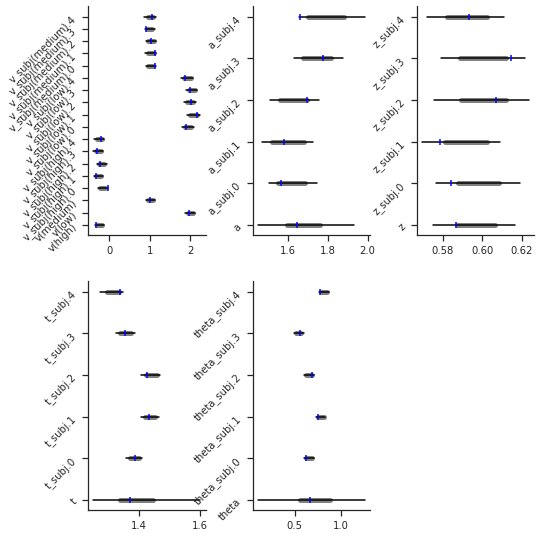

In [39]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 8),
                               columns = 3)

plt.show()

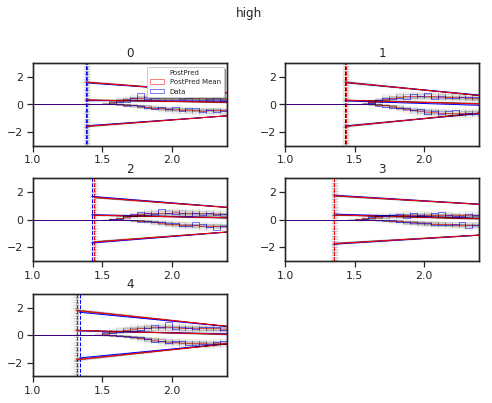

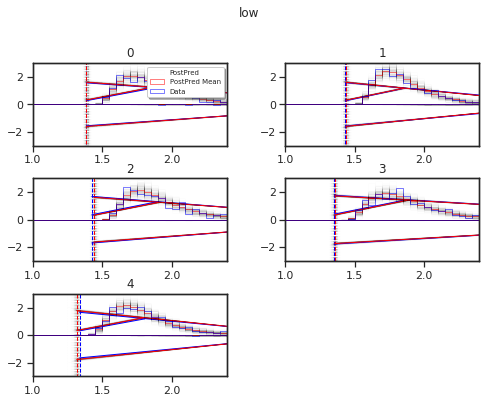

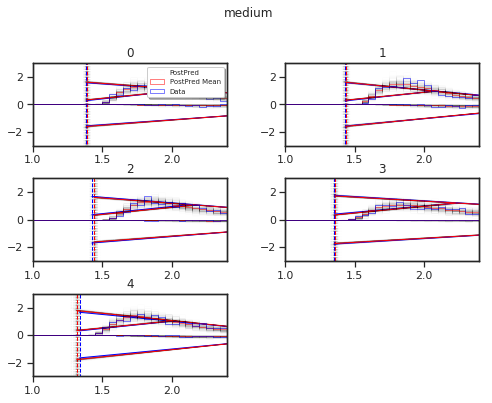

In [40]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(1, 2.5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_rts': True,
                                        'add_posterior_uncertainty_model': True,
                                        'samples': 200,
                                        'legend_fontsize': 7})
plt.show()

## Section 5: Regressors
This section provides a simple working example using the Neural Networks with the Regression backend. The regression back-end allows linking parameters to trial-by-trial covariates via a (general) linear model.

In [ ]:
# Metadata
nmcmc = 200
model = 'angle'
n_samples_by_subject = 500

In [ ]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 3,
                                                                                  n_samples_by_subject = n_samples_by_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = ['t ~ 1 + covariate_name', 'v ~ 1 + covariate_name'],
                                                                                  regression_covariates = {'covariate_name': {'type': 'continuous', 'range': (0, 1)}},
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [ ]:
# Set up the regressor a regressor:
reg_model_v = {'model': 'v ~ 1 + covariate_name', 'link_func': lambda x: x}
reg_model_t = {'model': 't ~ 1 + covariate_name', 'link_func': lambda x: x}
reg_descr = [reg_model_t, reg_model_v]


In [ ]:
# Make HDDM model
hddmnn_reg = hddm.HDDMnnRegressor(data,
                                  reg_descr,
                                  include = hddm.simulators.model_config[model]['hddm_include'],
                                  model = model,
                                  informative = False,
                                  p_outlier = 0.0)

In [ ]:
# Sample
hddmnn_reg.sample(nmcmc, burn = 100)

In [ ]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_reg,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 8),
                               columns = 3)

plt.show()

## Section 6: Stim Coding

In [2]:
# Metadata
nmcmc = 1000
burn = 500
model = 'angle'

In [3]:
# Load one of the datasets shipping with HDDM
cav_data = hddm.load_csv(hddm.__path__[0] + '/examples/cavanagh_theta_nn.csv')

### 8.2 Basic Condition Split Model

In [4]:
hddmnn_model_cav = hddm.HDDMnn(cav_data,
                               model = model,
                               informative = False,
                               include = hddm.simulators.model_config[model]['hddm_include'],
                               p_outlier = 0.05,
                               is_group_model = False,
                               depends_on = {'v': 'stim'})

{'v': 1.5, 'v_std': 1, 'a': 1, 'a_std': 1, 'z': 0.1, 'z_trans': 0.2, 't': 0.01, 't_std': 0.15, 'theta': 0.1, 'theta_std': 0.2}
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [5]:
hddmnn_model_cav.sample(nmcmc, burn = burn)

 [-----------------100%-----------------] 1000 of 1000 complete in 163.6 sec

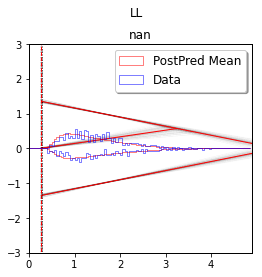

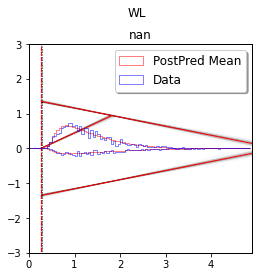

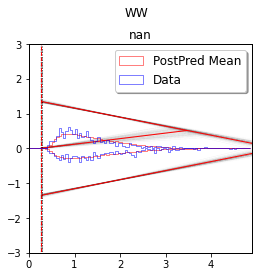

In [6]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_cav,
                                        columns = 1,
                                        figsize = (4, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200})
plt.show()

### 8.3 Basic Hierarchical Model

In [7]:
hddmnn_model_cav = hddm.HDDMnn(cav_data,
                               model = model,
                               informative = False,
                               include = hddm.simulators.model_config[model]['hddm_include'],
                               is_group_model = True,
                               p_outlier = 0.05)

{'v': 1.5, 'v_std': 1, 'a': 1, 'a_std': 1, 'z': 0.1, 'z_trans': 0.2, 't': 0.01, 't_std': 0.15, 'theta': 0.1, 'theta_std': 0.2}
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [8]:
hddmnn_model_cav.sample(nmcmc, burn = burn)

 [-----------------100%-----------------] 1001 of 1000 complete in 498.3 sec

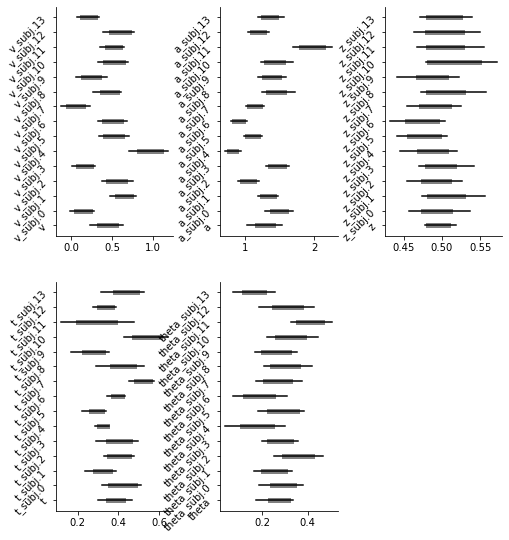

In [9]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model_cav,
                               figsize = (8, 8),
                               columns = 3)

plt.show()